## 1. Постановка задачи

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [7]:
import os
print(os.getcwd())

C:\Users\Administrator\CaseLab_1


In [9]:
taxi_data = pd.read_csv(r'C:\Users\Administrator\CaseLab_1\data_train\train.csv')
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [15]:
# Преобразование pickup_datetime в формат datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Определение минимальной и максимальной даты
min_date = taxi_data['pickup_datetime'].min()
max_date = taxi_data['pickup_datetime'].max()

print(f"Минимальная дата: {min_date}")
print(f"Максимальная дата: {max_date}")

Минимальная дата: 2016-01-01 00:00:17
Максимальная дата: 2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [18]:
# Преобразование pickup_datetime в формат datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Проверка на наличие пропусков и подсчет суммарного количества пропущенных значений
missing_values_count = taxi_data.isnull().sum()

# Выводим количество пропущенных значений для каждого столбца
print("Количество пропущенных значений в каждом столбце:")
print(missing_values_count)

# Общее количество пропущенных значений
total_missing_values = missing_values_count.sum()
print(f"Общее количество пропущенных значений: {total_missing_values}")

Количество пропущенных значений в каждом столбце:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64
Общее количество пропущенных значений: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [21]:
# а) Количество уникальных таксопарков
unique_vendors = taxi_data['vendor_id'].nunique()
print(f"Количество уникальных таксопарков: {unique_vendors}")

# б) Максимальное количество пассажиров
max_passengers = taxi_data['passenger_count'].max()
print(f"Максимальное количество пассажиров: {max_passengers}")

# в) Средняя и медианная длительность поездки (в секундах)
mean_trip_duration = round(taxi_data['trip_duration'].mean())
median_trip_duration = round(taxi_data['trip_duration'].median())
print(f"Средняя длительность поездки: {mean_trip_duration} сек")
print(f"Медианная длительность поездки: {median_trip_duration} сек")

# г) Минимальное и максимальное время поездки (в секундах)
min_trip_duration = taxi_data['trip_duration'].min()
max_trip_duration = taxi_data['trip_duration'].max()
print(f"Минимальное время поездки: {min_trip_duration} сек")
print(f"Максимальное время поездки: {max_trip_duration} сек")

Количество уникальных таксопарков: 2
Максимальное количество пассажиров: 9
Средняя длительность поездки: 959 сек
Медианная длительность поездки: 662 сек
Минимальное время поездки: 1 сек
Максимальное время поездки: 3526282 сек


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [26]:
# Функция для добавления новых временных признаков
def add_datetime_features(df):
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek  # Понедельник = 0, Воскресенье = 6
    return df

# Добавление новых признаков
taxi_data = add_datetime_features(taxi_data)

# а) Количество поездок в субботу (суббота = 5)
saturday_trips = taxi_data[taxi_data['pickup_day_of_week'] == 5].shape[0]
print(f"Количество поездок в субботу: {saturday_trips}")

# б) Среднее количество поездок в день
average_trips_per_day = round(taxi_data.groupby('pickup_date').size().mean())
print(f"Среднее количество поездок в день: {average_trips_per_day}")

Количество поездок в субботу: 220868
Среднее количество поездок в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [29]:
holiday_data = pd.read_csv(r'C:\Users\Administrator\CaseLab_1\data_train\NYC_2016Holidays.csv', sep=';')
holiday_data.head()

,Day,Date,Holiday
0,Friday,January 01,New Years Day
1,Monday,January 18,Martin Luther King Jr. Day
2,Friday,February 12,Lincoln's Birthday
3,Monday,February 15,Presidents' Day
4,Sunday,May 08,Mother's Day


In [31]:
# Функция для добавления признака pickup_holiday
def add_holiday_features(trip_data, holiday_data):
    # Преобразование столбцов с датами в формат datetime
    trip_data['pickup_date'] = pd.to_datetime(trip_data['pickup_datetime']).dt.date
    holiday_data['Date'] = pd.to_datetime(holiday_data['Date'], format='%B %d').dt.strftime('%m-%d')

    # Извлечение месяца и дня из pickup_date
    trip_data['pickup_month_day'] = pd.to_datetime(trip_data['pickup_date']).apply(lambda x: x.strftime('%m-%d'))

    # Создание бинарного признака pickup_holiday
    trip_data['pickup_holiday'] = trip_data['pickup_month_day'].isin(holiday_data['Date']).astype(int)

    # Удаление временных столбцов
    trip_data.drop(columns=['pickup_month_day'], inplace=True)

    return trip_data

# Добавление нового признака pickup_holiday
taxi_data = add_holiday_features(taxi_data, holiday_data)

# Медианная длительность поездки в праздничные дни
median_trip_duration_holiday = round(taxi_data[taxi_data['pickup_holiday'] == 1]['trip_duration'].median())
print(f"Медианная длительность поездки в праздничные дни: {median_trip_duration_holiday} сек")

Медианная длительность поездки в праздничные дни: 585 сек


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [34]:
osrm_data = pd.read_csv(r'C:\Users\Administrator\CaseLab_1\data_train\osrm_data_train.csv')
osrm_data.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [38]:
# Функция для добавления признаков из OSRM
def add_osrm_features(trip_data, osrm_data):
    # Преобразование id в индекс для удобства слияния
    trip_data = trip_data.set_index('id')
    osrm_data = osrm_data.set_index('id')

    # Объединение таблиц по индексу (id) с использованием суффиксов для столбцов с одинаковыми именами
    merged_data = trip_data.join(osrm_data[['total_distance', 'total_travel_time', 'number_of_steps']],
                                 how='left', lsuffix='', rsuffix='_osrm')

    return merged_data.reset_index()

# Преобразование pickup_datetime и dropoff_datetime в формат datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

# Добавление новых признаков из OSRM
taxi_data = add_osrm_features(taxi_data, osrm_data)

# а) Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM
median_trip_duration_data = taxi_data['trip_duration'].median()
median_trip_duration_osrm = taxi_data['total_travel_time_osrm'].median()
difference = round(median_trip_duration_data - median_trip_duration_osrm)
print(f"Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM: {difference} сек")

# б) Количество пропусков в столбцах с информацией из OSRM API после объединения таблиц
missing_values_count = taxi_data[['total_distance_osrm', 'total_travel_time_osrm', 'number_of_steps_osrm']].isnull().sum()
print("Количество пропусков в столбцах с информацией из OSRM API:")
print(missing_values_count)

Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM: 372 сек
Количество пропусков в столбцах с информацией из OSRM API:
total_distance_osrm       1
total_travel_time_osrm    1
number_of_steps_osrm      1
dtype: int64


In [40]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [43]:
# Функция для добавления географических признаков
def add_geographical_features(trip_data):
    trip_data['haversine_distance'] = get_haversine_distance(
        trip_data['pickup_latitude'], trip_data['pickup_longitude'],
        trip_data['dropoff_latitude'], trip_data['dropoff_longitude']
    )

    trip_data['direction'] = get_angle_direction(
        trip_data['pickup_latitude'], trip_data['pickup_longitude'],
        trip_data['dropoff_latitude'], trip_data['dropoff_longitude']
    )

    return trip_data

# Добавление новых признаков из OSRM
taxi_data = add_geographical_features(taxi_data)

# Медианное расстояние Хаверсина поездок (в киллометрах)
median_haversine_distance = round(taxi_data['haversine_distance'].median(), 2)
print(f"Медианное расстояние Хаверсина поездок (в киллометрах): {median_haversine_distance} км")

Медианное расстояние Хаверсина поездок (в киллометрах): 2.09 км


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [46]:
# Функция для добавления географических кластеров
def add_cluster_features(trip_data, kmeans_model):
    # Извлечение координат начальной точки и конечной точки
    coordinates = trip_data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].values

    # Предсказание кластеров для каждой поездки (используем все 4 координаты)
    clusters = kmeans_model.predict(coordinates)

    # Добавляем предсказанные кластеры в DataFrame
    trip_data['geo_cluster'] = clusters

    return trip_data


# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# Добавление новых признаков из кластеризации
taxi_data = add_cluster_features(taxi_data, kmeans)

# Количество поездок в наименьшем по размеру географическом кластере
cluster_counts = taxi_data['geo_cluster'].value_counts()
min_cluster_size = cluster_counts.min()
print(f"Количество поездок в наименьшем по размеру географическом кластере: {min_cluster_size}")

Количество поездок в наименьшем по размеру географическом кластере: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [49]:
weather_data = pd.read_csv(r'C:\Users\Administrator\CaseLab_1\data_train\weather_data.csv')
weather_data.head()
# ваш код здесь

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,NaN,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,NaN,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,NaN,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,NaN,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,NaN,Overcast,2015-12-31,6


In [51]:
# Функция для добавления погодных признаков
def add_weather_features(trip_data, weather_data):
    # Преобразование дат в формат datetime
    trip_data['pickup_datetime'] = pd.to_datetime(trip_data['pickup_datetime'])
    weather_data['time'] = pd.to_datetime(weather_data['time'])

    # Извлечение даты и часа из pickup_datetime
    trip_data['pickup_date'] = trip_data['pickup_datetime'].dt.date
    trip_data['pickup_hour'] = trip_data['pickup_datetime'].dt.hour

    # Извлечение даты и часа из time
    weather_data['date'] = weather_data['time'].dt.date
    weather_data['hour'] = weather_data['time'].dt.hour

    # Объединение таблиц по дате и часу
    merged_data = pd.merge(
        trip_data,
        weather_data[['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']],
        left_on=['pickup_date', 'pickup_hour'],
        right_on=['date', 'hour'],
        how='left'
    )

    # Удаление временных столбцов
    merged_data.drop(columns=['pickup_date', 'pickup_hour', 'date', 'hour'], inplace=True)

    return merged_data

# Добавление новых признаков из погодных данных
taxi_data = add_weather_features(taxi_data, weather_data)

# а) Количество поездок в снежную погоду
snow_trips = taxi_data[taxi_data['events'] == 'Snow'].shape[0]
print(f"Количество поездок в снежную погоду: {snow_trips}")

# б) Процент пропусков в столбцах с погодными условиями
total_rows = len(taxi_data)
missing_weather_rows = taxi_data[['temperature', 'visibility', 'wind speed', 'precip', 'events']].isnull().any(axis=1).sum()
missing_percentage = round((missing_weather_rows / total_rows) * 100, 3)
print(f"Процент пропусков в столбцах с погодными условиями: {missing_percentage}%")

Количество поездок в снежную погоду: 13126
Процент пропусков в столбцах с погодными условиями: 95.103%


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [54]:
# Функция для заполнения пропущенных значений в данных о поездках
def fill_null_weather_data(trip_data):
    # Заполнение пропусков в столбце events
    trip_data['events'] = trip_data['events'].fillna('None')

    # Преобразование pickup_datetime в формат datetime
    trip_data['pickup_datetime'] = pd.to_datetime(trip_data['pickup_datetime'])
    trip_data['pickup_date'] = trip_data['pickup_datetime'].dt.date

    # Группировка данных по pickup_date и расчет медианы для каждого столбца
    weather_columns = ['temperature', 'visibility', 'wind speed', 'precip']
    for column in weather_columns:
        median_values = trip_data.groupby('pickup_date')[column].transform('median')
        trip_data[column] = trip_data[column].fillna(median_values)

    # Заполнение пропусков в столбцах с информацией из OSRM API медианным значением по столбцам
    osrm_columns = ['total_distance', 'total_travel_time', 'number_of_steps']
    for column in osrm_columns:
        median_value = trip_data[column].median()
        trip_data[column] = trip_data[column].fillna(median_value)

    return trip_data



# Заполнение пропущенных значений
taxi_data = fill_null_weather_data(taxi_data)

# Медиана в столбце temperature после заполнения пропусков
median_temperature = round(taxi_data['temperature'].median(), 1)
print(f"Медиана в столбце temperature после заполнения пропусков: {median_temperature}")

Медиана в столбце temperature после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


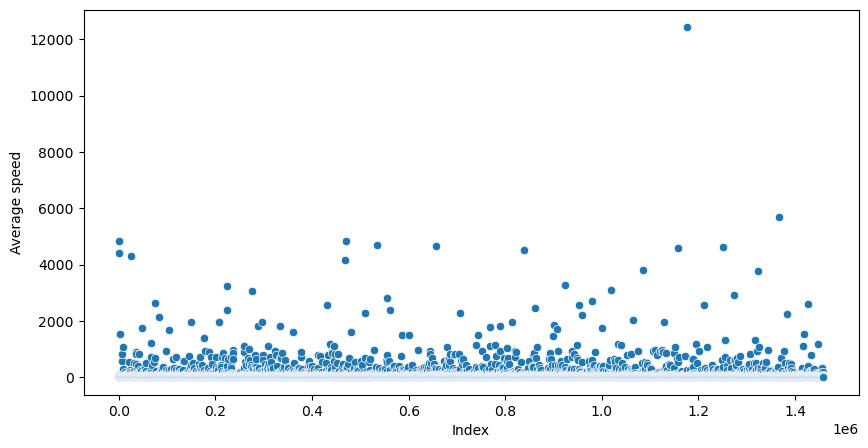

In [57]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

Количество выбросов по признаку длительности поездки: 4
Количество выбросов по признаку скорости: 407


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1616\4154538182.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data_cleaned['avg_speed'] = taxi_data_cleaned['total_distance'] / taxi_data_cleaned['trip_duration'] * 3.6


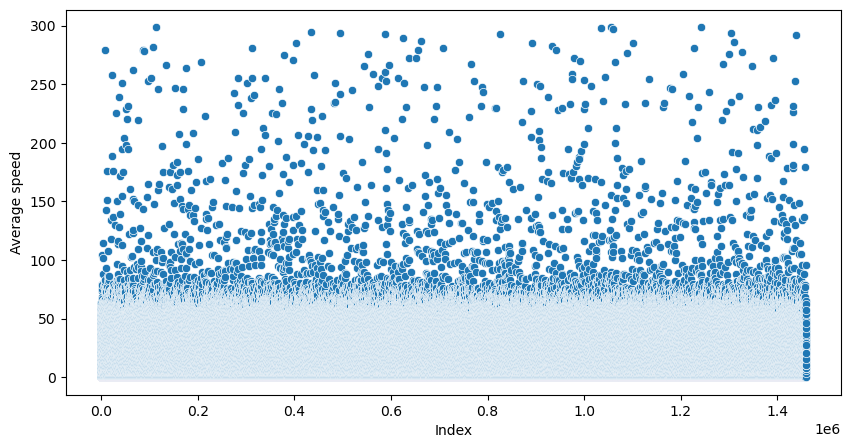

In [61]:

# а) Поездки, длительность которых превышает 24 часа (в секундах)
long_trips = taxi_data[taxi_data['trip_duration'] > 24 * 3600]
num_long_trips = len(long_trips)

# Удаление этих поездок из набора данных
taxi_data_cleaned = taxi_data[taxi_data['trip_duration'] <= 24 * 3600]

print(f"Количество выбросов по признаку длительности поездки: {num_long_trips}")

# б) Вычисление средней скорости
taxi_data_cleaned['avg_speed'] = taxi_data_cleaned['total_distance'] / taxi_data_cleaned['trip_duration'] * 3.6

# Поездки, средняя скорость которых превышает 300 км/ч
fast_trips = taxi_data_cleaned[taxi_data_cleaned['avg_speed'] > 300]
num_fast_trips = len(fast_trips)

# Удаление этих поездок из набора данных
taxi_data_final = taxi_data_cleaned[taxi_data_cleaned['avg_speed'] <= 300]

print(f"Количество выбросов по признаку скорости: {num_fast_trips}")

# Построение диаграммы рассеяния для проверки
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=taxi_data_final.index, y=taxi_data_final['avg_speed'], ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed')
plt.show()

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [66]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

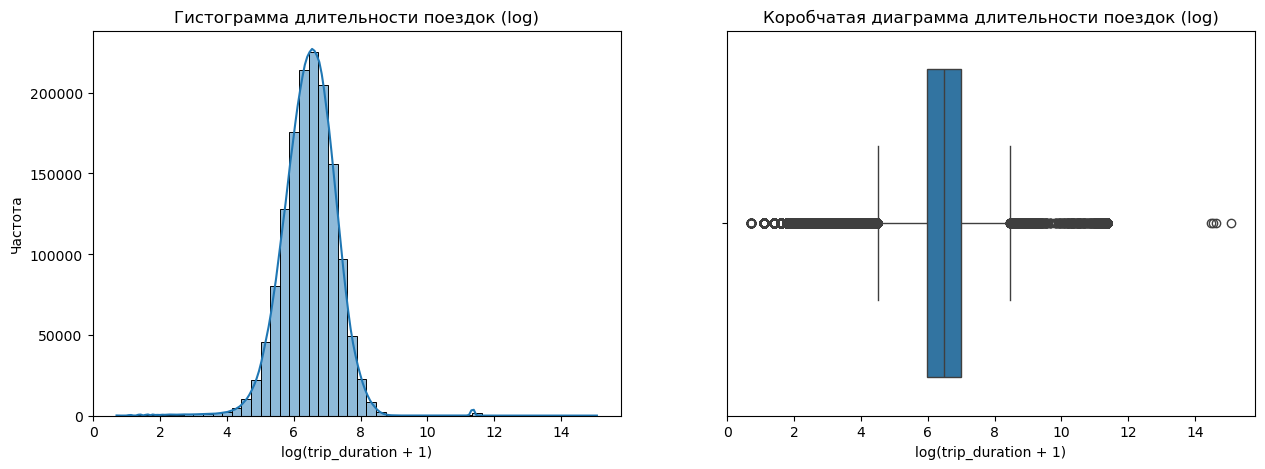

Вычисленный p-value: 0.0
Распределение длительности поездок в логарифмическом масштабе не является нормальным.


In [69]:
# а) Гистограмма и коробчатая диаграмма для trip_duration_log
plt.figure(figsize=(15, 5))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(taxi_data['trip_duration_log'], bins=50, kde=True)
plt.title('Гистограмма длительности поездок (log)')
plt.xlabel('log(trip_duration + 1)')
plt.ylabel('Частота')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=taxi_data['trip_duration_log'])
plt.title('Коробчатая диаграмма длительности поездок (log)')
plt.xlabel('log(trip_duration + 1)')

plt.show()

# б) Тест Д'Агостино на нормальность распределения
statistic, p_value = normaltest(taxi_data['trip_duration_log'])

# Округление p-value до сотых
p_value_rounded = round(p_value, 2)

print(f"Вычисленный p-value: {p_value_rounded}")

# Проверка гипотезы о нормальности распределения
alpha = 0.05
if p_value < alpha:
    print("Распределение длительности поездок в логарифмическом масштабе не является нормальным.")
else:
    print("Распределение длительности поездок в логарифмическом масштабе является нормальным.")

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

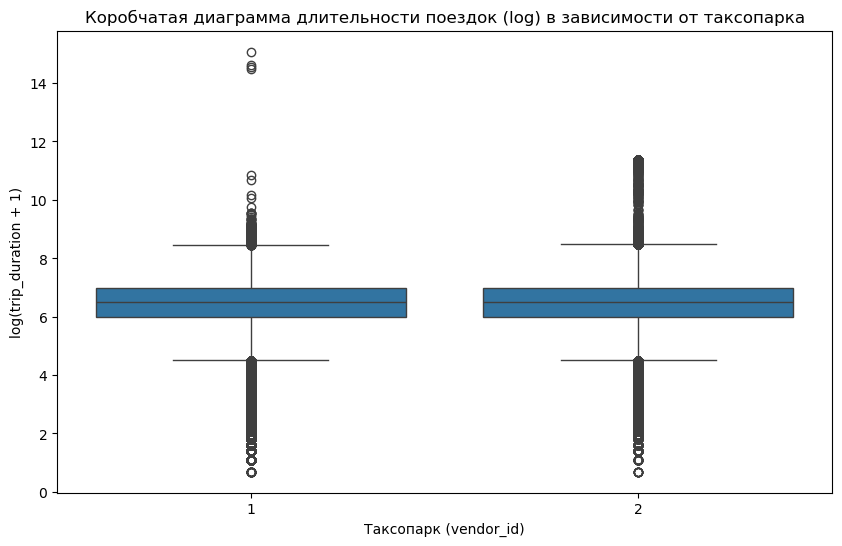

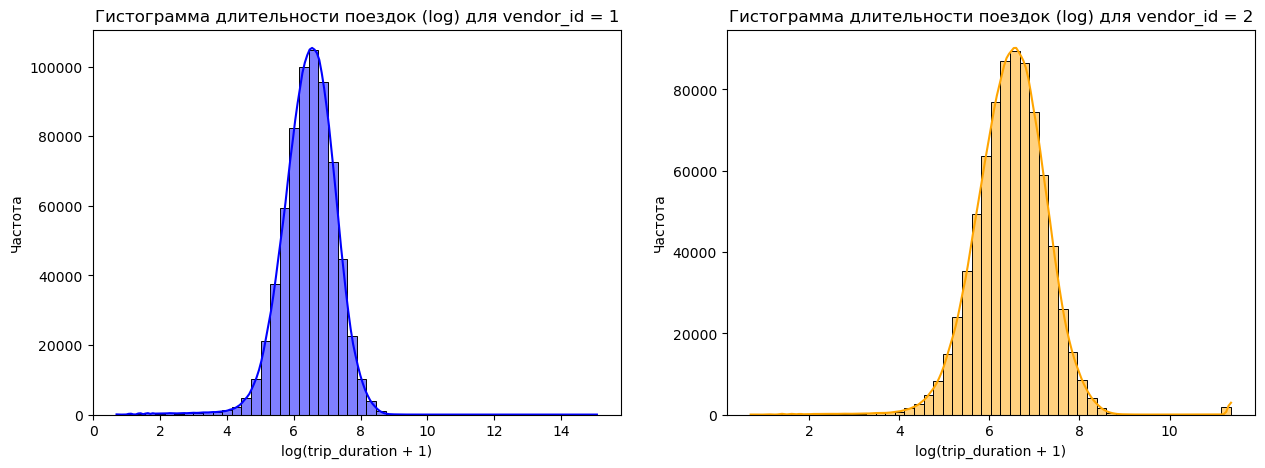

In [72]:
# а) Коробчатая диаграмма для trip_duration_log в зависимости от vendor_id
plt.figure(figsize=(10, 6))
sns.boxplot(x='vendor_id', y='trip_duration_log', data=taxi_data)
plt.title('Коробчатая диаграмма длительности поездок (log) в зависимости от таксопарка')
plt.xlabel('Таксопарк (vendor_id)')
plt.ylabel('log(trip_duration + 1)')
plt.show()

# б) Гистограммы для trip_duration_log в зависимости от vendor_id
plt.figure(figsize=(15, 5))

# Гистограмма для vendor_id = 1
plt.subplot(1, 2, 1)
sns.histplot(taxi_data[taxi_data['vendor_id'] == 1]['trip_duration_log'], bins=50, kde=True, color='blue')
plt.title('Гистограмма длительности поездок (log) для vendor_id = 1')
plt.xlabel('log(trip_duration + 1)')
plt.ylabel('Частота')

# Гистограмма для vendor_id = 2
plt.subplot(1, 2, 2)
sns.histplot(taxi_data[taxi_data['vendor_id'] == 2]['trip_duration_log'], bins=50, kde=True, color='orange')
plt.title('Гистограмма длительности поездок (log) для vendor_id = 2')
plt.xlabel('log(trip_duration + 1)')
plt.ylabel('Частота')

plt.show()

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

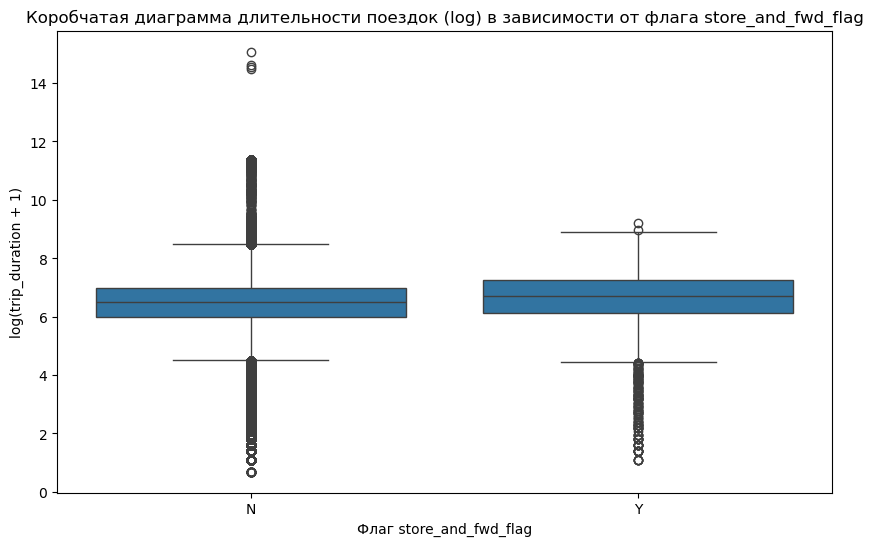

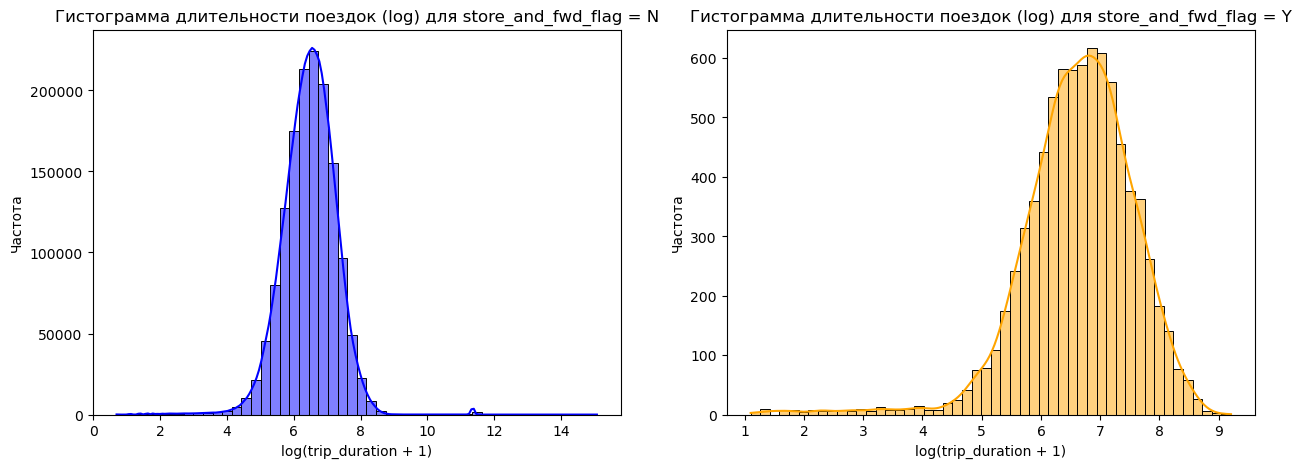

In [75]:
# а) Коробчатая диаграмма для trip_duration_log в зависимости от store_and_fwd_flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_and_fwd_flag', y='trip_duration_log', data=taxi_data)
plt.title('Коробчатая диаграмма длительности поездок (log) в зависимости от флага store_and_fwd_flag')
plt.xlabel('Флаг store_and_fwd_flag')
plt.ylabel('log(trip_duration + 1)')
plt.show()

# б) Гистограммы для trip_duration_log в зависимости от store_and_fwd_flag
plt.figure(figsize=(15, 5))

# Гистограмма для store_and_fwd_flag = 'N'
plt.subplot(1, 2, 1)
sns.histplot(taxi_data[taxi_data['store_and_fwd_flag'] == 'N']['trip_duration_log'], bins=50, kde=True, color='blue')
plt.title('Гистограмма длительности поездок (log) для store_and_fwd_flag = N')
plt.xlabel('log(trip_duration + 1)')
plt.ylabel('Частота')

# Гистограмма для store_and_fwd_flag = 'Y'
plt.subplot(1, 2, 2)
sns.histplot(taxi_data[taxi_data['store_and_fwd_flag'] == 'Y']['trip_duration_log'], bins=50, kde=True, color='orange')
plt.title('Гистограмма длительности поездок (log) для store_and_fwd_flag = Y')
plt.xlabel('log(trip_duration + 1)')
plt.ylabel('Частота')

plt.show()

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1616\3972464336.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=taxi_data, palette='viridis')


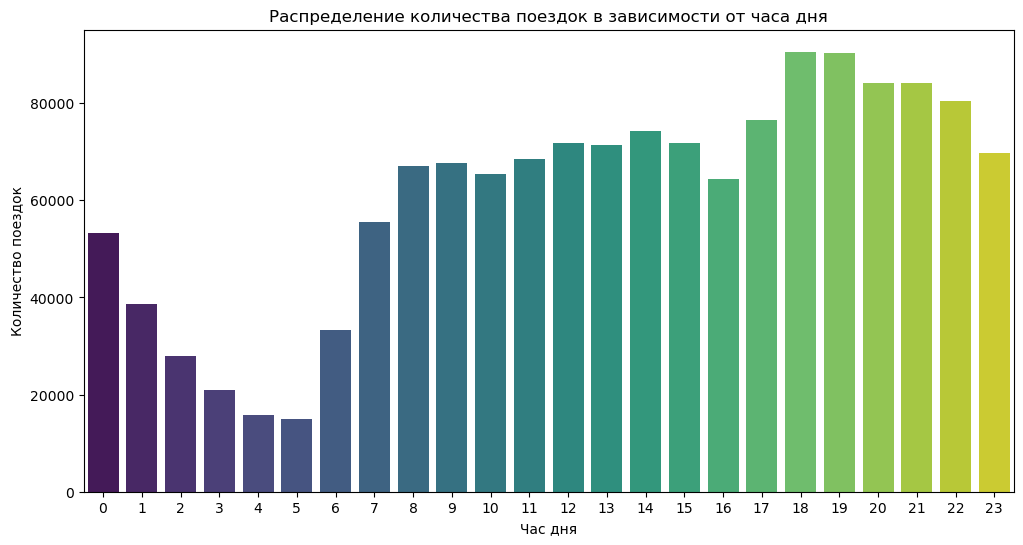

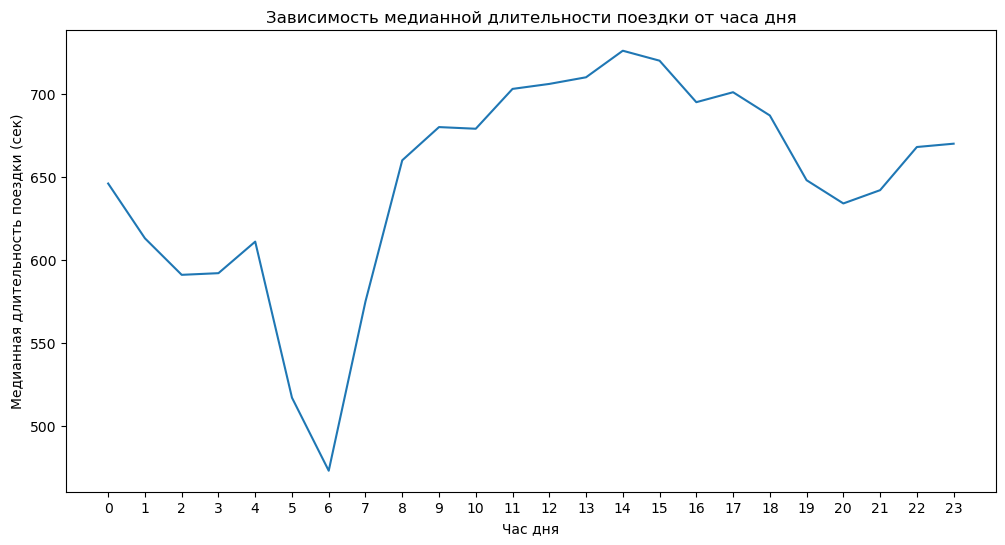

Такси заказывают реже всего в 5 час.
Пик медианной длительности поездок наблюдается в 14 час.


In [78]:
# Извлечение часа из pickup_datetime
taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour

# а) Гистограмма распределения количества поездок в зависимости от часа дня
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', data=taxi_data, palette='viridis')
plt.title('Распределение количества поездок в зависимости от часа дня')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 24))
plt.show()

# б) Линейный график зависимости медианной длительности поездки от часа дня
median_trip_duration_by_hour = taxi_data.groupby('pickup_hour')['trip_duration'].median()
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_trip_duration_by_hour)
plt.title('Зависимость медианной длительности поездки от часа дня')
plt.xlabel('Час дня')
plt.ylabel('Медианная длительность поездки (сек)')
plt.xticks(range(0, 24))
plt.show()

# Ответы на вопросы:
# а) В какое время суток такси заказывают реже всего?
least_frequent_hour = taxi_data['pickup_hour'].value_counts().idxmin()
print(f"Такси заказывают реже всего в {least_frequent_hour} час.")

# б) В какое время суток наблюдается пик медианной длительности поездок?
peak_median_duration_hour = median_trip_duration_by_hour.idxmax()
print(f"Пик медианной длительности поездок наблюдается в {peak_median_duration_hour} час.")

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1616\1635929982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_day_of_week', data=taxi_data, palette='viridis')


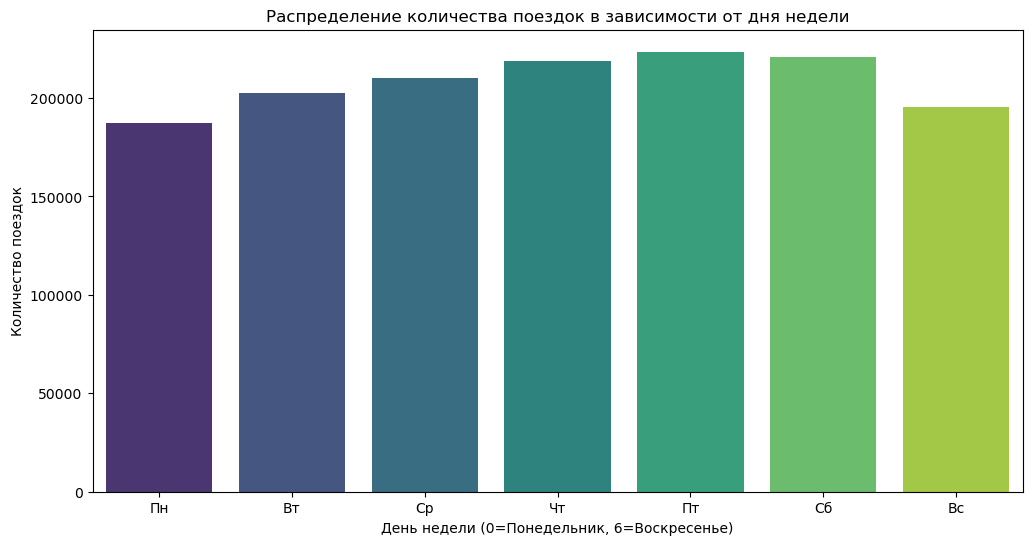

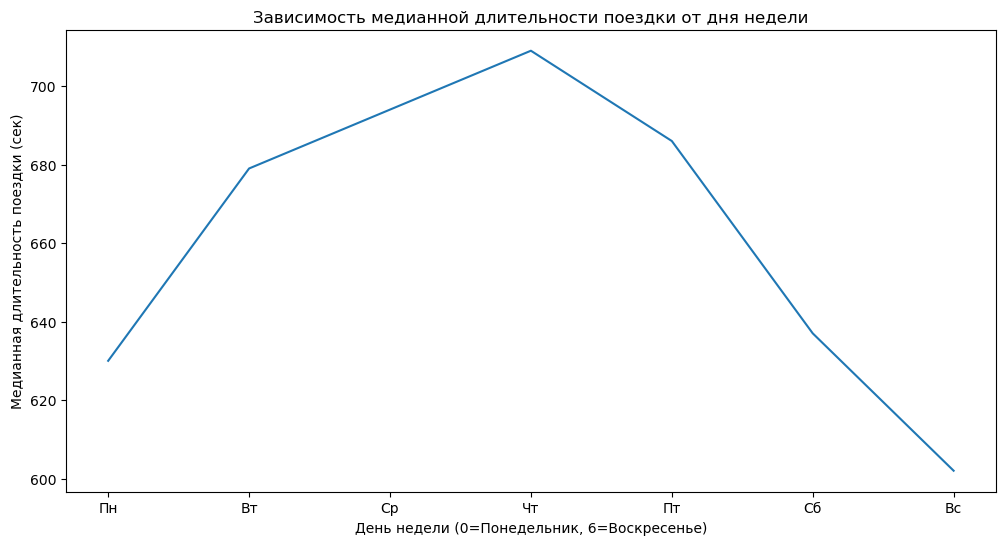

Больше всего поездок совершается в Пт.
Медианная длительность поездок наименьшая в Вс.


In [81]:
# Извлечение дня недели из pickup_datetime (понедельник=0, воскресенье=6)
taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.dayofweek

# а) Гистограмма распределения количества поездок в зависимости от дня недели
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_day_of_week', data=taxi_data, palette='viridis')
plt.title('Распределение количества поездок в зависимости от дня недели')
plt.xlabel('День недели (0=Понедельник, 6=Воскресенье)')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

# б) Линейный график зависимости медианной длительности поездки от дня недели
median_trip_duration_by_day = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_trip_duration_by_day)
plt.title('Зависимость медианной длительности поездки от дня недели')
plt.xlabel('День недели (0=Понедельник, 6=Воскресенье)')
plt.ylabel('Медианная длительность поездки (сек)')
plt.xticks(range(0, 7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

# Ответы на вопросы:
# а) В какой день недели совершается больше всего поездок?
most_frequent_day = taxi_data['pickup_day_of_week'].value_counts().idxmax()
most_frequent_day_name = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'][most_frequent_day]
print(f"Больше всего поездок совершается в {most_frequent_day_name}.")

# б) В какой день недели медианная длительность поездок наименьшая?
min_median_duration_day = median_trip_duration_by_day.idxmin()
min_median_duration_day_name = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'][min_median_duration_day]
print(f"Медианная длительность поездок наименьшая в {min_median_duration_day_name}.")

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1616\231204270.py:6: FutureWarning: The provided callable <function median at 0x0000025B7D05E160> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot_table = taxi_data.pivot_table(


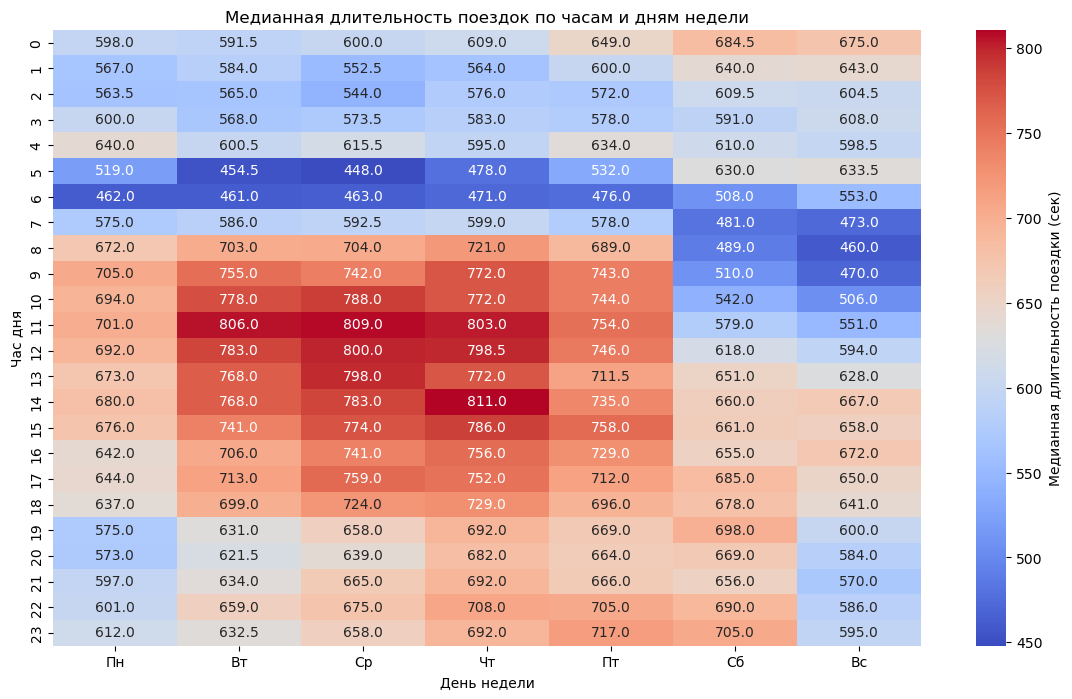

In [84]:
# Извлечение часа и дня недели из pickup_datetime
taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour
taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.dayofweek

# Построение сводной таблицы с медианной длительностью поездки для каждого часа и дня недели
pivot_table = taxi_data.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc=np.median,
    fill_value=0  # Заполнение пропущенных значений нулями (если есть)
)

# Переименуем столбцы для удобства чтения
pivot_table.columns = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

# Визуализация сводной таблицы с помощью тепловой карты
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Медианная длительность поездки (сек)'})
plt.title('Медианная длительность поездок по часам и дням недели')
plt.xlabel('День недели')
plt.ylabel('Час дня')
plt.show()

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


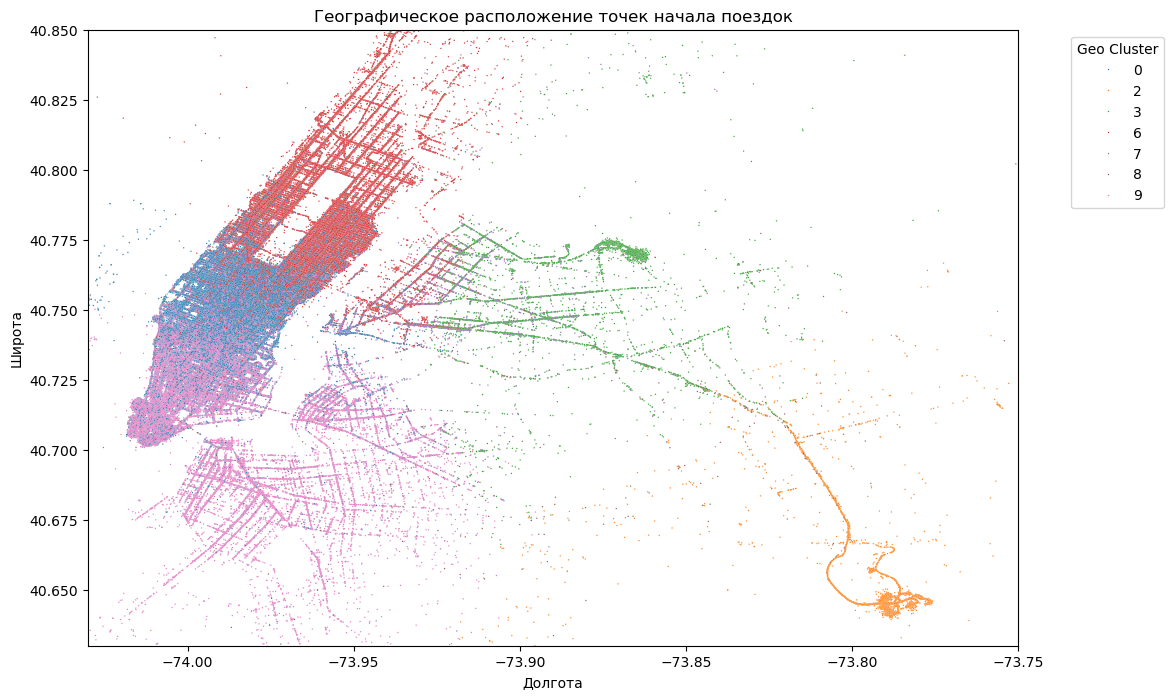

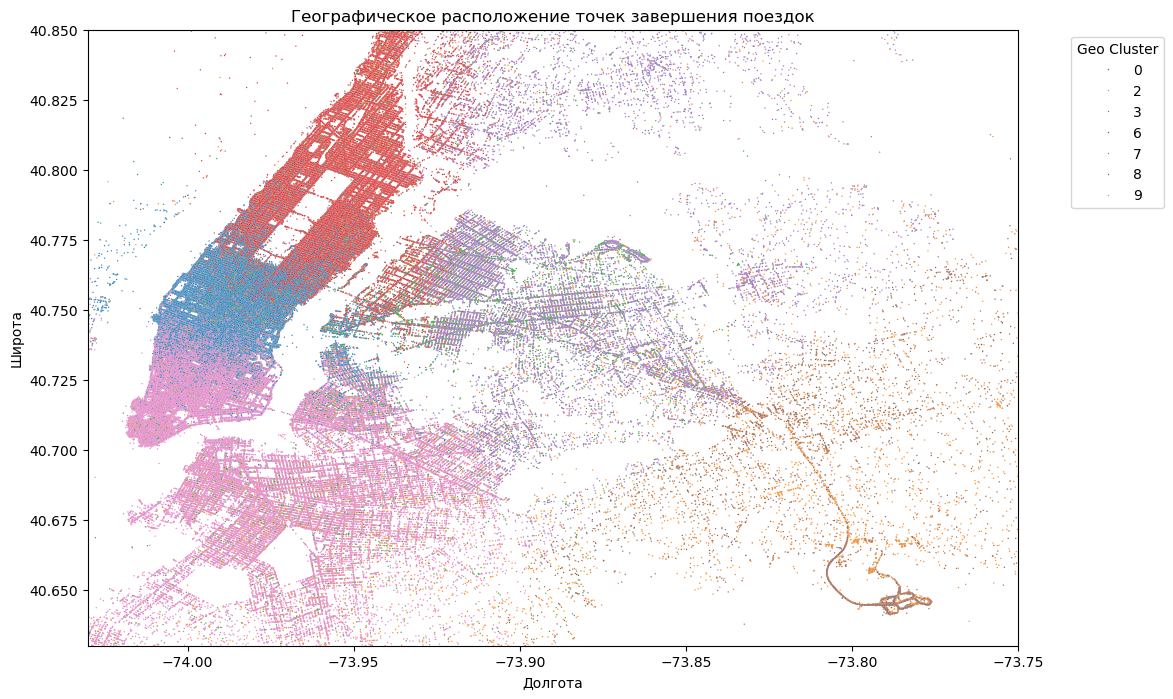

In [87]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Фильтрация данных по границам Нью-Йорка
filtered_taxi_data = taxi_data[
    (taxi_data['pickup_longitude'] >= city_long_border[0]) &
    (taxi_data['pickup_longitude'] <= city_long_border[1]) &
    (taxi_data['pickup_latitude'] >= city_lat_border[0]) &
    (taxi_data['pickup_latitude'] <= city_lat_border[1]) &
    (taxi_data['dropoff_longitude'] >= city_long_border[0]) &
    (taxi_data['dropoff_longitude'] <= city_long_border[1]) &
    (taxi_data['dropoff_latitude'] >= city_lat_border[0]) &
    (taxi_data['dropoff_latitude'] <= city_lat_border[1])
]

# а) Диаграмма рассеяния для точек начала поездок
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='pickup_longitude',
    y='pickup_latitude',
    hue='geo_cluster',
    data=filtered_taxi_data,
    palette='tab10',
    s=1  # Уменьшение размера точек
)
plt.title('Географическое расположение точек начала поездок')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.legend(title='Geo Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# б) Диаграмма рассеяния для точек завершения поездок
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='geo_cluster',
    data=filtered_taxi_data,
    palette='tab10',
    s=1  # Уменьшение размера точек
)
plt.title('Географическое расположение точек завершения поездок')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.legend(title='Geo Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [91]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458644, 30)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day_of_week', 'pickup_holiday',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'total_distance_osrm', 'total_travel_time_osrm', 'number_of_steps_osrm',
       'haversine_distance', 'direction', 'geo_cluster', 'temperature',
       'visibility', 'wind speed', 'precip', 'events', 'pickup_date',
       'trip_duration_log', 'pickup_hour'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [94]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,direction,geo_cluster,temperature,visibility,wind speed,precip,events,pickup_date,trip_duration_log,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,99.970196,6,4.4,8.0,27.8,0.3,None,2016-03-14,6.122493,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,-117.153768,9,28.9,16.1,7.4,0.0,None,2016-06-12,6.498282,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,-159.680165,9,-6.7,16.1,24.1,0.0,None,2016-01-19,7.661527,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,-172.737700,9,7.2,16.1,25.9,0.0,None,2016-04-06,6.063785,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,179.473585,6,9.4,16.1,9.3,0.0,None,2016-03-26,6.077642,13


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [97]:
# а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?
# Ответ: 'id'

# б) Утечка данных (data leak) - это...
# Ответ: наличие в обучающем наборе данных информации, которая недоступна на момент прогнозирования.

# в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?
# Ответ: 'trip_duration'

# г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными.
train_data.drop(columns=['id', 'trip_duration'], inplace=True)

# Количество оставшихся столбцов
remaining_columns_count = train_data.shape[1]
print(f"Количество оставшихся столбцов: {remaining_columns_count}")

Количество оставшихся столбцов: 28


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [100]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458644, 26)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [103]:
# а) Закодируем признак vendor_id
train_data['vendor_id_encoded'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)

# б) Закодируем признак store_and_fwd_flag
train_data['store_and_fwd_flag_encoded'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# а) Рассчитаем среднее по закодированному столбцу vendor_id
mean_vendor_id = round(train_data['vendor_id_encoded'].mean(), 2)
print(f"Среднее по закодированному столбцу vendor_id: {mean_vendor_id}")

# б) Рассчитаем среднее по закодированному столбцу store_and_fwd_flag
mean_store_and_fwd_flag = round(train_data['store_and_fwd_flag_encoded'].mean(), 3)
print(f"Среднее по закодированному столбцу store_and_fwd_flag: {mean_store_and_fwd_flag}")

Среднее по закодированному столбцу vendor_id: 0.53
Среднее по закодированному столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events.


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [106]:
from sklearn.preprocessing import OneHotEncoder
# Выбираем признаки для кодирования
categorical_features = ['pickup_day_of_week', 'geo_cluster', 'events']

# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Получаем закодированные признаки
encoded_features = one_hot_encoder.fit_transform(train_data[categorical_features])

# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out(categorical_features)

# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(encoded_features.toarray(), columns=column_names)

# Количество сгенерированных бинарных столбцов
num_binary_columns = data_onehot.shape[1]
print(f"Количество сгенерированных бинарных столбцов: {num_binary_columns}")

Количество сгенерированных бинарных столбцов: 18


Добавим полученную таблицу с закодированными признаками:

In [109]:
# Удаляем оригинальные категориальные признаки из train_data
columns_to_change = categorical_features
train_data = train_data.drop(columns=columns_to_change)

# Добавляем закодированные признаки к train_data
train_data = pd.concat(
    [train_data.reset_index(drop=True), data_onehot],
    axis=1
)

# Выводим форму обновленного DataFrame
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458644, 43)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [112]:
X = train_data.drop(['trip_duration_log'], axis=1)
y = taxi_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [116]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log,
    test_size=0.33,
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 42 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   vendor_id                   1458644 non-null  int64         
 1   dropoff_datetime            1458644 non-null  datetime64[ns]
 2   passenger_count             1458644 non-null  int64         
 3   pickup_longitude            1458644 non-null  float64       
 4   pickup_latitude             1458644 non-null  float64       
 5   dropoff_longitude           1458644 non-null  float64       
 6   dropoff_latitude            1458644 non-null  float64       
 7   store_and_fwd_flag          1458644 non-null  object        
 8   pickup_holiday              1458644 non-null  int32         
 9   total_distance              1458644 non-null  float64       
 10  total_travel_time           1458644 non-null  float64       
 11  number_of_steps         

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Предположим, что данные уже загружены в DataFrame taxi_data и train_data
# Пример содержимого файла train_data:
# vendor_id	pickup_datetime	dropoff_datetime	passenger_count	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	store_and_fwd_flag	total_distance	total_travel_time	number_of_steps	total_distance_osrm	total_travel_time_osrm	number_of_steps_osrm	haversine_distance	direction	temperature	visibility	wind speed	precip	events	pickup_holiday	pickup_date	trip_duration_log	pickup_hour	...
# 2	2016-03-14 17:24:55	2016-03-14 17:32:30	1	-73.982155	40.767937	-73.964630	40.765602	N	2009.1	164.9	5	2009.1	164.9	5	2.0	10.0	7.8	8.0	5.6	0.8	None	0	2016-03-14	6.120296926258282	17	...
# 1	2016-06-12 00:43:35	2016-06-12 00:54:38	1	-73.980415	40.738564	-73.999481	40.731152	N	2513.2	332.0	6	2513.2	332.0	6	2.5	20.0	7.2	12.9	7.4	0.3	None	6	2016-06-12	6.498282149476377	0	...

# Формируем матрицу наблюдений X и вектор целевой переменной y_log
X = train_data.drop(['trip_duration_log'], axis=1)
y_log = train_data['trip_duration_log']

# Удаляем столбцы с типом данных Timestamp (например, pickup_datetime, dropoff_datetime, pickup_date)
X = X.drop(columns=['store_and_fwd_flag', 'dropoff_datetime'])

# Заполняем пропущенные значения числовых признаков медианами
numerical_features = [
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
    'passenger_count', 'total_distance', 'total_travel_time', 'number_of_steps',
    'total_distance_osrm', 'total_travel_time_osrm', 'number_of_steps_osrm',
    'haversine_distance', 'direction', 'temperature', 'visibility',
    'wind speed', 'precip', 'pickup_hour'
]

imputer = SimpleImputer(strategy='median')
X[numerical_features] = imputer.fit_transform(X[numerical_features])

# Разбиваем выборку на обучающую и валидационную части
X_train, X_valid, y_train_log, y_valid_log = train_test_split(
    X, y_log,
    test_size=0.33,
    random_state=42
)

# Отбор 25 лучших признаков с помощью SelectKBest
selector = SelectKBest(score_func=f_regression, k=25)
selector.fit(X_train, y_train_log)

# Получаем маску отобранных признаков
selected_features_mask = selector.get_support()

# Получаем названия отобранных признаков
best_features = X.columns[selected_features_mask]

# Выводим названия отобранных признаков
print('Отобранные признаки:')
print(best_features.tolist())

# Создаем новые матрицы наблюдений с отобранными признаками
X_train_selected = selector.transform(X_train)
X_valid_selected = selector.transform(X_valid)

# Если нужно вернуть DataFrame после трансформации
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_valid_selected_df = pd.DataFrame(X_valid_selected, columns=selected_features)

print('Shape of X_train_selected: {}'.format(X_train_selected.shape))
print('Shape of X_valid_selected: {}'.format(X_valid_selected.shape))

Отобранные признаки:
['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_holiday', 'total_distance', 'total_travel_time', 'number_of_steps', 'total_distance_osrm', 'total_travel_time_osrm', 'number_of_steps_osrm', 'haversine_distance', 'temperature', 'pickup_hour', 'pickup_day_of_week_2', 'pickup_day_of_week_3', 'pickup_day_of_week_5', 'pickup_day_of_week_6', 'geo_cluster_2', 'geo_cluster_3', 'geo_cluster_6', 'geo_cluster_7', 'geo_cluster_8']
Shape of X_train_selected: (977291, 25)
Shape of X_valid_selected: (481353, 25)


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Создаем новые матрицы наблюдений с отобранными признаками
X_train_selected = selector.transform(X_train)
X_valid_selected = selector.transform(X_valid)

# Преобразуем результаты обратно в DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_valid_selected_df = pd.DataFrame(X_valid_selected, columns=selected_features)

# Нормализуем предикторы в обучающей и валидационной выборках с помощью MinMaxScaler
scaler = MinMaxScaler()

# Обучаем нормализатор на обучающей выборке
scaler.fit(X_train_selected_df)

# Применяем трансформацию к обучающей и валидационной выборкам
X_train_scaled = scaler.transform(X_train_selected_df)
X_valid_scaled = scaler.transform(X_valid_selected_df)

# Преобразуем результаты обратно в DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns=selected_features)

# Рассчитываем среднее арифметическое для первого предиктора в валидационной выборке
mean_first_predictor = round(X_valid_scaled_df.iloc[:, 0].mean(), 2)

print(f"Среднее арифметическое для первого предиктора в валидационной выборке: {mean_first_predictor}")

# Выводим форму обработанных данных
print('Shape of X_train_scaled: {}'.format(X_train_scaled_df.shape))
print('Shape of X_valid_scaled: {}'.format(X_valid_scaled_df.shape))

Среднее арифметическое для первого предиктора в валидационной выборке: 0.53
Shape of X_train_scaled: (977291, 25)
Shape of X_valid_scaled: (481353, 25)


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Отбор 25 лучших признаков с помощью SelectKBest
selector = SelectKBest(score_func=f_regression, k=25)
selector.fit(X_train, y_train_log)

# Получаем маску отобранных признаков
selected_features_mask = selector.get_support()

# Получаем названия отобранных признаков
selected_features = X.columns[selected_features_mask]

# Создаем новые матрицы наблюдений с отобранными признаками
X_train_selected = selector.transform(X_train)
X_valid_selected = selector.transform(X_valid)

# Преобразуем результаты обратно в DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_valid_selected_df = pd.DataFrame(X_valid_selected, columns=selected_features)

# Нормализуем предикторы в обучающей и валидационной выборках с помощью MinMaxScaler
scaler = MinMaxScaler()

# Обучаем нормализатор на обучающей выборке
scaler.fit(X_train_selected_df)

# Применяем трансформацию к обучающей и валидационной выборкам
X_train_scaled = scaler.transform(X_train_selected_df)
X_valid_scaled = scaler.transform(X_valid_selected_df)


# Создаем новые матрицы наблюдений с отобранными признаками
X_train_selected = selector.transform(X_train)
X_valid_selected = selector.transform(X_valid)

# Преобразуем результаты обратно в DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_valid_selected_df = pd.DataFrame(X_valid_selected, columns=selected_features)

# Нормализуем предикторы в обучающей и валидационной выборках с помощью MinMaxScaler
scaler = MinMaxScaler()

# Обучаем нормализатор на обучающей выборке
scaler.fit(X_train_selected_df)

# Применяем трансформацию к обучающей и валидационной выборкам
X_train_scaled = scaler.transform(X_train_selected_df)
X_valid_scaled = scaler.transform(X_valid_selected_df)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

# Предсказание на обучающей и валидационной выборках
y_train_pred_log = model.predict(X_train_scaled)
y_valid_pred_log = model.predict(X_valid_scaled)

# Рассчет RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmsle_train = round(rmsle(y_train_log, y_train_pred_log), 2)
rmsle_valid = round(rmsle(y_valid_log, y_valid_pred_log), 2)

print(f"RMSLE на тренировочной выборке: {rmsle_train}")
print(f"RMSLE на валидационной выборке: {rmsle_valid}")

RMSLE на тренировочной выборке: 0.54
RMSLE на валидационной выборке: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [61]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Генерация полиномиальных признаков 2-ой степени
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.transform(X_valid_scaled)

# Построение модели линейной регрессии на полиномиальных признаках
model = LinearRegression()
model.fit(X_train_poly, y_train_log)

# Предсказание на обучающей и валидационной выборках
y_train_pred_log = model.predict(X_train_poly)
y_valid_pred_log = model.predict(X_valid_poly)

# Рассчет RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmsle_train = round(rmsle(y_train_log, y_train_pred_log), 2)
rmsle_valid = round(rmsle(y_valid_log, y_valid_pred_log), 2)

print(f"RMSLE на тренировочной выборке: {rmsle_train}")
print(f"RMSLE на валидационной выборке: {rmsle_valid}")

# б) Анализ наличия переобучения
if rmsle_train < rmsle_valid and rmsle_train * 0.8 > rmsle_valid:
    print("Признаки переобучения наблюдаются.")
else:
    print("Признаки переобучения не наблюдаются.")

RMSLE на тренировочной выборке: 0.47
RMSLE на валидационной выборке: 0.71
Признаки переобучения не наблюдаются.


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Построение модели полиномиальной регрессии с L2-регуляризацией (Ridge)
model = Ridge(alpha=1.0)  # Коэффициент регуляризации alpha установлен равным 1
model.fit(X_train_poly, y_train_log)

# Предсказание на обучающей и валидационной выборках
y_train_pred_log = model.predict(X_train_poly)
y_valid_pred_log = model.predict(X_valid_poly)

# Рассчет RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmsle_train = round(rmsle(y_train_log, y_train_pred_log), 2)
rmsle_valid = round(rmsle(y_valid_log, y_valid_pred_log), 2)

print(f"RMSLE на тренировочной выборке: {rmsle_train}")
print(f"RMSLE на валидационной выборке: {rmsle_valid}")

RMSLE на тренировочной выборке: 0.48
RMSLE на валидационной выборке: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Построение модели дерева решений
model = DecisionTreeRegressor(random_state=42)  # Все параметры по умолчанию
model.fit(X_train_scaled, y_train_log)

# Предсказание на обучающей и валидационной выборках
y_train_pred_log = model.predict(X_train_scaled)
y_valid_pred_log = model.predict(X_valid_scaled)

# Рассчет RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmsle_train = round(rmsle(y_train_log, y_train_pred_log), 2)
rmsle_valid = round(rmsle(y_valid_log, y_valid_pred_log), 2)

print(f"RMSLE на тренировочной выборке: {rmsle_train}")
print(f"RMSLE на валидационной выборке: {rmsle_valid}")

# б) Анализ наличия переобучения
if rmsle_train < rmsle_valid and rmsle_train * 0.8 > rmsle_valid:
    print("Признаки переобучения наблюдаются.")
else:
    print("Признаки переобучения не наблюдаются.")

RMSLE на тренировочной выборке: 0.0
RMSLE на валидационной выборке: 0.57
Признаки переобучения не наблюдаются.


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


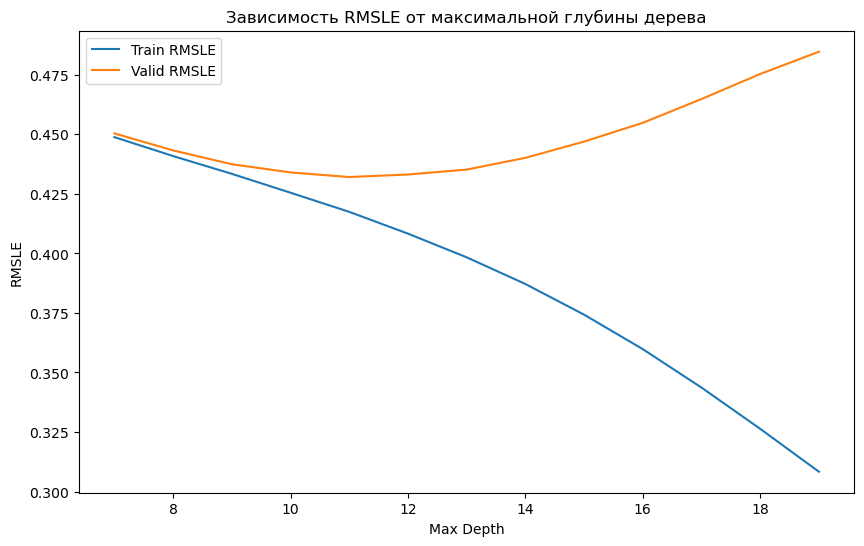

Оптимальное значение максимальной глубины дерева: 11
RMSLE на тренировочной выборке для дерева с оптимальной глубиной: 0.42
RMSLE на валидационной выборке для дерева с оптимальной глубиной: 0.43


In [64]:
# Определяем функцию для расчета RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Перебираем все возможные значения максимальной глубины дерева решений
max_depths = range(7, 20)
train_rmsle_scores = []
valid_rmsle_scores = []

for max_depth in max_depths:
    # Построение модели дерева решений
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train_scaled, y_train_log)

    # Предсказание на обучающей и валидационной выборках
    y_train_pred_log = model.predict(X_train_scaled)
    y_valid_pred_log = model.predict(X_valid_scaled)

    # Рассчет RMSLE
    rmsle_train = rmsle(y_train_log, y_train_pred_log)
    rmsle_valid = rmsle(y_valid_log, y_valid_pred_log)

    train_rmsle_scores.append(rmsle_train)
    valid_rmsle_scores.append(rmsle_valid)

# Построение графиков изменения метрик RMSLE в зависимости от глубины дерева
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_rmsle_scores, label='Train RMSLE')
plt.plot(max_depths, valid_rmsle_scores, label='Valid RMSLE')
plt.xlabel('Max Depth')
plt.ylabel('RMSLE')
plt.title('Зависимость RMSLE от максимальной глубины дерева')
plt.legend()
plt.show()

# а) Найдите оптимальное значение максимальной глубины дерева
optimal_depth = max_depths[np.argmin(valid_rmsle_scores)]
print(f"Оптимальное значение максимальной глубины дерева: {optimal_depth}")

# б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной?
best_model = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
best_model.fit(X_train_scaled, y_train_log)

y_train_best_pred_log = best_model.predict(X_train_scaled)
y_valid_best_pred_log = best_model.predict(X_valid_scaled)

rmsle_train_best = round(rmsle(y_train_log, y_train_best_pred_log), 2)
rmsle_valid_best = round(rmsle(y_valid_log, y_valid_best_pred_log), 2)

print(f"RMSLE на тренировочной выборке для дерева с оптимальной глубиной: {rmsle_train_best}")
print(f"RMSLE на валидационной выборке для дерева с оптимальной глубиной: {rmsle_valid_best}")

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [65]:
from sklearn.ensemble import RandomForestRegressor

# Построение модели случайного леса
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42
)
model.fit(X_train_scaled, y_train_log)

# Предсказание на обучающей и валидационной выборках
y_train_pred_log = model.predict(X_train_scaled)
y_valid_pred_log = model.predict(X_valid_scaled)

# Рассчет RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmsle_train = round(rmsle(y_train_log, y_train_pred_log), 2)
rmsle_valid = round(rmsle(y_valid_log, y_valid_pred_log), 2)

print(f"RMSLE на тренировочной выборке: {rmsle_train}")
print(f"RMSLE на валидационной выборке: {rmsle_valid}")

RMSLE на тренировочной выборке: 0.4
RMSLE на валидационной выборке: 0.42


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [159]:
from sklearn.ensemble import GradientBoostingRegressor

# Определяем функцию для расчета RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Построение модели градиентного бустинга
model = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)
model.fit(X_train_scaled, y_train_log)

# Предсказание на обучающей и валидационной выборках
y_train_pred_log = model.predict(X_train_scaled)
y_valid_pred_log = model.predict(X_valid_scaled)

# Рассчет RMSLE
rmsle_train = round(rmsle(y_train_log, y_train_pred_log), 2)
rmsle_valid = round(rmsle(y_valid_log, y_valid_pred_log), 2)

print(f"RMSLE на тренировочной выборке: {rmsle_train}")
print(f"RMSLE на валидационной выборке: {rmsle_valid}")

RMSLE на тренировочной выборке: 0.38
RMSLE на валидационной выборке: 0.4


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


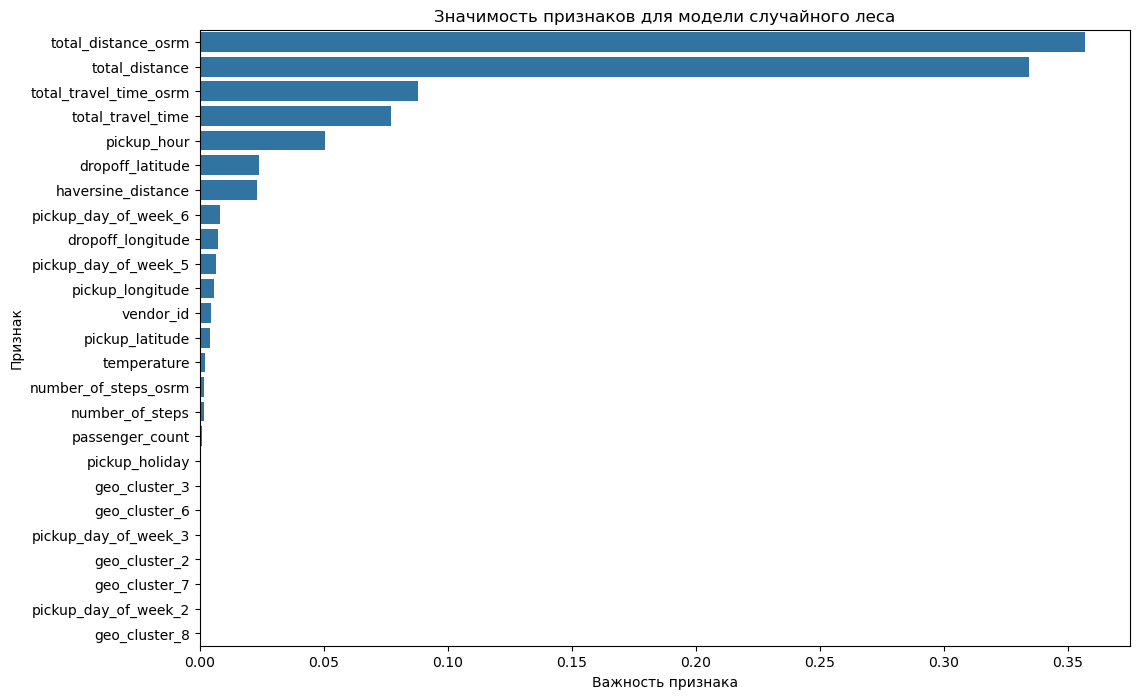

Топ-3 наиболее значимых факторов: ['total_distance_osrm', 'total_distance', 'total_travel_time_osrm']


In [66]:

# Определяем функцию для расчета RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Построение модели случайного леса
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42
)
model.fit(X_train_scaled, y_train_log)

# Получаем важности признаков
feature_importances = model.feature_importances_

# Создаем DataFrame с важностями признаков и их названиями
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Сортируем признаки по значению важности в порядке убывания
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Построение столбчатой диаграммы коэффициентов значимости каждого из факторов
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Значимость признаков для модели случайного леса')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.show()

# Выводим топ-3 наиболее значимых факторов
top_3_features = importance_df.head(3)['Feature'].tolist()
print(f"Топ-3 наиболее значимых факторов: {top_3_features}")

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [67]:
from sklearn.metrics import median_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# Определяем функцию для расчета RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Построение модели градиентного бустинга
model = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)
model.fit(X_train_scaled, y_train_log)

# Предсказание на валидационной выборке
y_valid_pred_log = model.predict(X_valid_scaled)

# Восстанавливаем исходные значения продолжительности поездок из логарифмического масштаба
y_valid_pred = np.exp(y_valid_pred_log) - 1
y_valid = np.exp(y_valid_log) - 1

# Рассчет медианной абсолютной ошибки (MeAE)
meae = median_absolute_error(y_valid, y_valid_pred)

# Переводим MeAE из секунд в минуты и округляем до десятых
meae_minutes = round(meae / 60, 1)

print(f"Медианная абсолютная ошибка (MeAE) в минутах: {meae_minutes}")

Медианная абсолютная ошибка (MeAE) в минутах: 1.9


## Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [180]:
test_data = pd.read_csv(r"C:\Users\Administrator\CaseLab_1\data_test\test.csv")
osrm_data_test = pd.read_csv(r"C:\Users\Administrator\CaseLab_1\data_test\osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [182]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
holiday_data = pd.read_csv(r'C:\Users\Administrator\CaseLab_1\data_train\NYC_2016Holidays.csv', sep=';')
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)



In [183]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
 9   pickup_date         625134 non-null  object        
 10  pickup_hour         625134 non-null  int32         
 11  pickup_day_of_week  625134 non-null  int32         
 12  pickup_holiday      625134 non-null  int32         
 13  total_distance      625134 no

In [184]:
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

In [189]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
 9   pickup_day_of_week  625134 non-null  int32         
 10  pickup_holiday      625134 non-null  int32         
 11  total_distance      625134 non-null  float64       
 12  total_travel_time   625134 non-null  float64       
 13  number_of_steps     625134 no

In [191]:
print("Первоначальные best_features:")
print(best_features)

# Преобразуем Index в список
best_features_list = list(best_features)

# Удаляем элементы из списка
elements_to_remove = ['total_distance_osrm', 'total_travel_time_osrm', 'number_of_steps_osrm', 'pickup_hour']
for element in elements_to_remove:
    if element in best_features_list:
        best_features_list.remove(element)

# Преобразуем обратно в Index, если это необходимо
best_features = pd.Index(best_features_list)

print("\nОбновленные best_features:")
print(best_features)

Первоначальные best_features:
Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_holiday',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'haversine_distance', 'temperature', 'pickup_day_of_week_2',
       'pickup_day_of_week_3', 'pickup_day_of_week_5', 'pickup_day_of_week_6',
       'geo_cluster_2', 'geo_cluster_3', 'geo_cluster_6', 'geo_cluster_7',
       'geo_cluster_8'],
      dtype='object')

Обновленные best_features:
Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_holiday',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'haversine_distance', 'temperature', 'pickup_day_of_week_2',
       'pickup_day_of_week_3', 'pickup_day_of_week_5', 'pickup_day_of_week_6',
       'geo_cluster_2', 'geo_cluster_3', 'geo_cluster_6', 'geo_cluster_7',
       'geo_cluster_8'],
      dt

In [193]:


test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot],
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- number_of_steps_osrm
- pickup_hour
- total_distance_osrm
- total_travel_time_osrm


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9,
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1,
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)